Imports

In [2]:
%load_ext autoreload
%autoreload 2
%aimport -numpy
%aimport -torch
%aimport -gym

import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
torch.manual_seed(0)

# for saving/loading
import os

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Our functions

In [22]:
from Train_policy_func import Policy, Policy_v2, device
from Generate_traj_func import generate_trajectory
from Plot_Functions import plot_suboptimality, plot_trajectory_performance, plot_Scores, plot_suboptimality_three_policies
from PPO import ppo_update, RolloutBuffer, evaluate_policy

# Training loop for OPPO
from OPPO import baseline_CartPole_V0, baseline_MountainCar, OPPO_update
from OPPO import baseline_1, baseline_CartPole_v0_Fla
from PPO_Fla import *
from pairs_generator import sample_preference_pairs
from DPO import DPO_training



beta by default 0.5


Creating policies and changing seeds:

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\youss\AppData\Local\Temp\ipykernel_15996\181302822.py:42: FutureWarning: You are using `torch.l

Evaluations over 100 episodes done for both policies


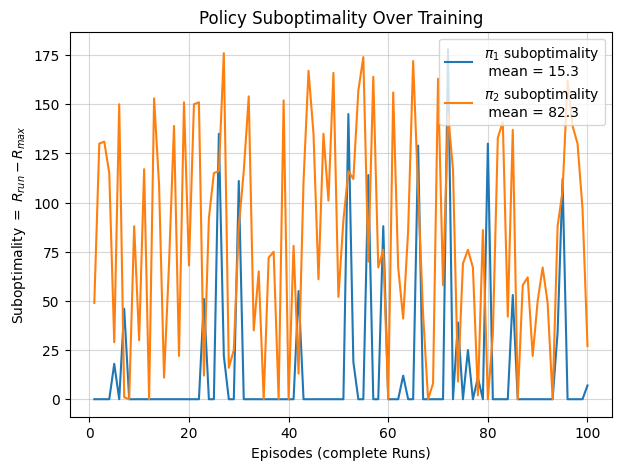

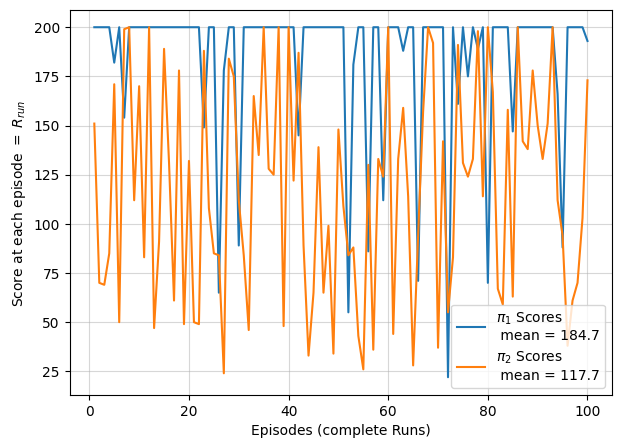

π₁ → length 200, total reward 200.0
π₂ → length 47, total reward 47.0
Collected 10 preference pairs.
Epoch 0: DPO Loss = 18.5039


C:\Users\youss\AppData\Local\Temp\ipykernel_15996\181302822.py:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_DPO.load_state_dict(torch.load(f"pi2_oppo_{env_name}_

Epoch 10: DPO Loss = 0.5700
Epoch 20: DPO Loss = 0.0038
Epoch 30: DPO Loss = 0.0017
Epoch 40: DPO Loss = 0.0017
Epoch 50: DPO Loss = 0.0014
Epoch 60: DPO Loss = 0.0010
Epoch 70: DPO Loss = 0.0008
Epoch 80: DPO Loss = 0.0006
Epoch 90: DPO Loss = 0.0005
Epoch 100: DPO Loss = 0.0004
Epoch 110: DPO Loss = 0.0004
Epoch 120: DPO Loss = 0.0003
Epoch 130: DPO Loss = 0.0003
Epoch 140: DPO Loss = 0.0003
Epoch 150: DPO Loss = 0.0003
Epoch 160: DPO Loss = 0.0002
Epoch 170: DPO Loss = 0.0002
Epoch 180: DPO Loss = 0.0002
Epoch 190: DPO Loss = 0.0002
Epoch 200: DPO Loss = 0.0002
Epoch 210: DPO Loss = 0.0002
Epoch 220: DPO Loss = 0.0002
Epoch 230: DPO Loss = 0.0002
Epoch 240: DPO Loss = 0.0002
Epoch 250: DPO Loss = 0.0001
Epoch 260: DPO Loss = 0.0001
Epoch 270: DPO Loss = 0.0001
Epoch 280: DPO Loss = 0.0001
Epoch 290: DPO Loss = 0.0001
Epoch 300: DPO Loss = 0.0001
Epoch 310: DPO Loss = 0.0001
Epoch 320: DPO Loss = 0.0001
Epoch 330: DPO Loss = 0.0001
Epoch 340: DPO Loss = 0.0001
Epoch 350: DPO Loss = 0

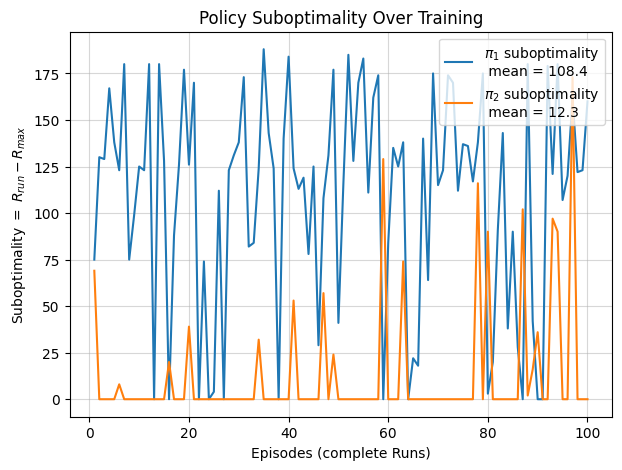

Evaluations over 100 episodes done for both policies


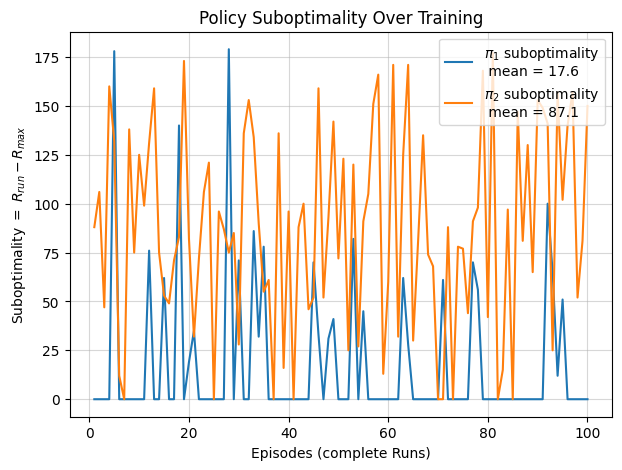

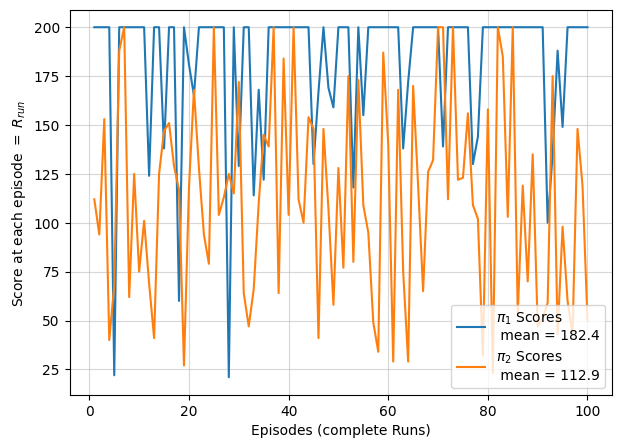

π₁ → length 200, total reward 200.0
π₂ → length 194, total reward 194.0
Collected 10 preference pairs.
Epoch 0: DPO Loss = 3.9745
Epoch 10: DPO Loss = 0.3554
Epoch 20: DPO Loss = 0.1960
Epoch 30: DPO Loss = 0.1121
Epoch 40: DPO Loss = 0.0652
Epoch 50: DPO Loss = 0.0393
Epoch 60: DPO Loss = 0.0287
Epoch 70: DPO Loss = 0.0217
Epoch 80: DPO Loss = 0.0167
Epoch 90: DPO Loss = 0.0130
Epoch 100: DPO Loss = 0.0102
Epoch 110: DPO Loss = 0.0080
Epoch 120: DPO Loss = 0.0064
Epoch 130: DPO Loss = 0.0052
Epoch 140: DPO Loss = 0.0044
Epoch 150: DPO Loss = 0.0037
Epoch 160: DPO Loss = 0.0032
Epoch 170: DPO Loss = 0.0028
Epoch 180: DPO Loss = 0.0025
Epoch 190: DPO Loss = 0.0022
Epoch 200: DPO Loss = 0.0020
Epoch 210: DPO Loss = 0.0018
Epoch 220: DPO Loss = 0.0016
Epoch 230: DPO Loss = 0.0015
Epoch 240: DPO Loss = 0.0014
Epoch 250: DPO Loss = 0.0013
Epoch 260: DPO Loss = 0.0012
Epoch 270: DPO Loss = 0.0011
Epoch 280: DPO Loss = 0.0011
Epoch 290: DPO Loss = 0.0010
Epoch 300: DPO Loss = 0.0009
Epoch 310

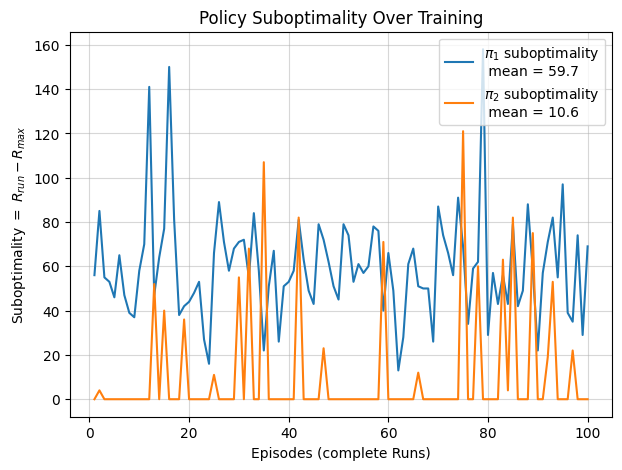

Evaluations over 100 episodes done for both policies


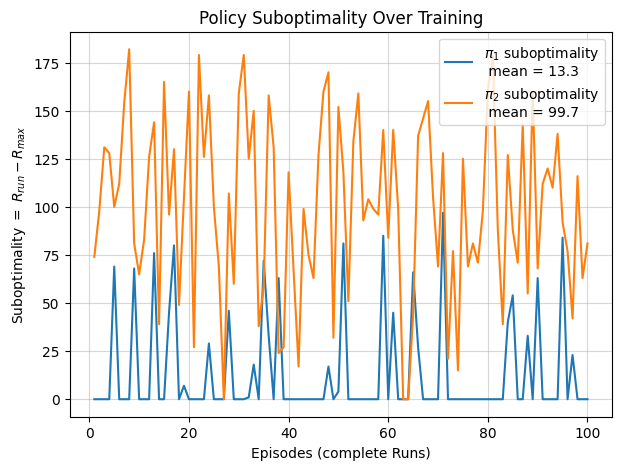

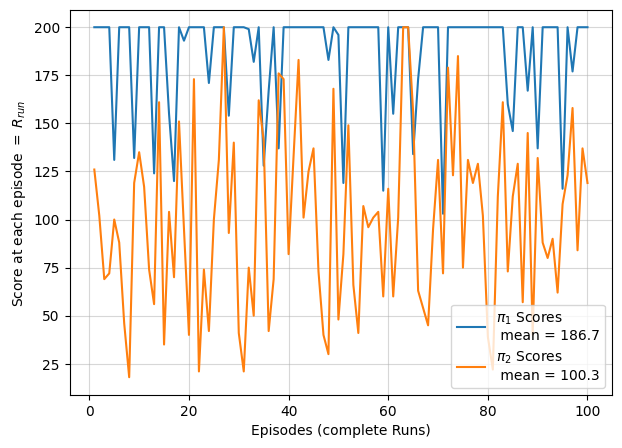

π₁ → length 200, total reward 200.0
π₂ → length 127, total reward 127.0
Collected 10 preference pairs.
Epoch 0: DPO Loss = 7.8746
Epoch 10: DPO Loss = 0.7498
Epoch 20: DPO Loss = 0.1773
Epoch 30: DPO Loss = 0.0255
Epoch 40: DPO Loss = 0.0161
Epoch 50: DPO Loss = 0.0086
Epoch 60: DPO Loss = 0.0074
Epoch 70: DPO Loss = 0.0064
Epoch 80: DPO Loss = 0.0057
Epoch 90: DPO Loss = 0.0053
Epoch 100: DPO Loss = 0.0049
Epoch 110: DPO Loss = 0.0046
Epoch 120: DPO Loss = 0.0043
Epoch 130: DPO Loss = 0.0041
Epoch 140: DPO Loss = 0.0038
Epoch 150: DPO Loss = 0.0036
Epoch 160: DPO Loss = 0.0034
Epoch 170: DPO Loss = 0.0032
Epoch 180: DPO Loss = 0.0031
Epoch 190: DPO Loss = 0.0029
Epoch 200: DPO Loss = 0.0028
Epoch 210: DPO Loss = 0.0026
Epoch 220: DPO Loss = 0.0025
Epoch 230: DPO Loss = 0.0024
Epoch 240: DPO Loss = 0.0022
Epoch 250: DPO Loss = 0.0021
Epoch 260: DPO Loss = 0.0020
Epoch 270: DPO Loss = 0.0019
Epoch 280: DPO Loss = 0.0019
Epoch 290: DPO Loss = 0.0018
Epoch 300: DPO Loss = 0.0017
Epoch 310

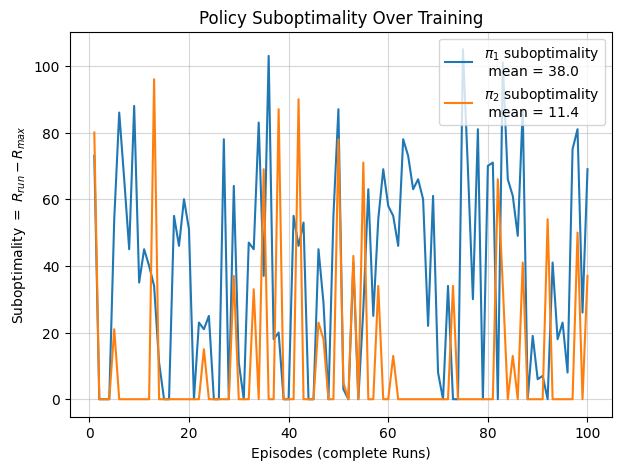

In [46]:
seeds_list=[42,100,35]
for seed in seeds_list:
    # Choose environment:

    # env 1: CartPole-v0
    env_name='CartPole-v0'
    baseline = baseline_CartPole_v0_Fla
    target_score = 185 # for CartPole-v0
    torch.manual_seed(seed)
    # env 2: Continuous-MountainCar-v0
    # env_name='MountainCar-v0'
    # baseline = baseline_MountainCar
    # target_score = -110 # for Continuous-MountainCar-v0

    lr_oppo = 0.003 # learning rate for OPPO

    load_policies = True

    # ── Hyperparams for OPPO ──
    n_episodes              = 1200 # keep same “number of iterations” for fair comparison
    max_t                   = 200  # cap on steps per episode
    print_every             = 20   # print every x episodes and avg also the score for every x episodes
    gamma                   = 0.99

    seed_training_policies  = seed


    # ── Instantiate the two policies & optimizers for OPPO ──
    env_oppo   = gym.make(env_name)

    pi1_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt1_oppo    = torch.optim.Adam(pi1_oppo.parameters(), lr=lr_oppo)

    pi2_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt2_oppo   = torch.optim.Adam(pi2_oppo.parameters(), lr=lr_oppo)


    # ── Load the policies if you want to reuse them ──
    if load_policies:
        pi1_oppo.load_state_dict(torch.load(f"pi1_oppo_{env_name}_seed_{seed}.pth"))


    # ── Run the OPPO training ──
    if not load_policies:
    # Training the policy:
        scores_oppo = OPPO_update(
            policy       = pi1_oppo,
            optimizer    = opt1_oppo,
            env          = env_oppo,
            baseline     = baseline,
            n_episodes   = n_episodes,
            max_t        = max_t,
            gamma        = gamma,      # you can reuse your PPO γ
            print_every  = print_every,
            early_stop   = False,
            seed = seed_training_policies,
            target_score = target_score,
            env_name= env_name,
            display_every = False
        )

    pi2_oppo.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))


    # seed_evaluation = 26
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(pi1_oppo, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(pi2_oppo, env_oppo, n_episodes=num_episodes)
    print("Evaluations over", num_episodes, "episodes done for both policies")

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        max_reward=200, # for CartPole-v0
    )

    plot_Scores(
        pi1_reward,
        pi2_reward,
    )
    traj1 = generate_trajectory(pi1_oppo, env_oppo, max_steps=1000)
    traj2 = generate_trajectory(pi2_oppo, env_oppo, max_steps=1000)

    print(f"π₁ → length {len(traj1)}, total reward {sum(s['reward'] for s in traj1):.1f}")
    print(f"π₂ → length {len(traj2)}, total reward {sum(s['reward'] for s in traj2):.1f}")
    K=10
    prefs = sample_preference_pairs(pi1_oppo, pi2_oppo, env_oppo, K=K) # Need to define K elsewhere as hyperparameter
    print(f"Collected {len(prefs)} preference pairs.")
    lr_DPO=0.01

    policy_DPO=Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    policy_ref=pi1_oppo
    #policy_ref=pi2_oppo
    opt_DPO    = torch.optim.Adam(policy_DPO.parameters(), lr=lr_DPO)
    policy_DPO.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))
    #policy_DPO.load_state_dict(torch.load(f"pi1_oppo_{env_name}_seed_{seed}.pth"))

    beta=0.5

    DPO_training(policy_DPO,policy_ref,prefs,beta,opt_DPO,nb_epochs=400)
    torch.save(policy_DPO.state_dict(), f"pi_DPO_{env_name}_seed_{seed}_beta{beta}_K{K}.pth")
    print(f"Saved final policy as pi_DPO_{env_name}_seed_{seed}_beta{beta}_K{K}.pth")
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(policy_DPO, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(policy_ref, env_oppo, n_episodes=num_episodes)

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        200,
    )  # in cartpole, 200 is the maximum reward



Averaging over the different seeds

In [47]:
file_pi1=[f"pi1_oppo_{env_name}_seed_{seed}.pth"]
file_pi2=[f"pi2_oppo_{env_name}_seed_{seed}.pth"]
file_pi_DPO=[f"pi_DPO_oppo_{env_name}_seed_{seed}.pth",f"pi_DPO_oppo_{env_name}_seed_{seed}_K200.pth",f"pi_DPO_oppo_{env_name}_seed_{seed}_beta0.005.pth",f"pi_DPO_oppo_{env_name}_seed_{seed}_beta1_invverted.pth"]

import torch
import numpy as np
import os

def load_policy(file_path, state_dim, action_dim, device="cpu"):
    policy = Policy(state_size=state_dim, action_size=action_dim).to(device)
    policy.load_state_dict(torch.load(file_path, map_location=device))
    return policy

def evaluate_all_policies(env, seeds, env_name, num_episodes=10, device="cpu"):
    results = {}

    # === PI1 and PI2 (vary by seed) ===
    for label in ["pi1", "pi2"]:
        returns = []
        rewards_list=np.zeros(num_episodes)
        for seed in seeds:
            file_path = f"{label}_oppo_{env_name}_seed_{seed}.pth"
            if not os.path.exists(file_path):
                print(f"Missing file: {file_path}")
                continue

            policy = load_policy(file_path, env.observation_space.shape[0], env.action_space.n, device)
            mean_return, rewards_per_ep = evaluate_policy(policy, env, n_episodes=num_episodes)
            returns.append(mean_return)
            rewards_list+=rewards_per_ep
        results[label] = {
            "mean": np.mean(returns),
            "std": np.std(returns),
            "per_seed": returns,
            "graph":rewards_list/len(seeds)
        }

    # === PI_DPO variants (filename includes other params) ===
    pi_DPO_files = [
        f"pi_DPO_{env_name}_seed_{seed}.pth",
        f"pi_DPO_{env_name}_seed_{seed}_K200.pth",
        f"pi_DPO_{env_name}_seed_{seed}_beta0.005.pth",
        f"pi_DPO_{env_name}_seed_{seed}_beta0.5_K10.pth",
        f"pi_DPO_{env_name}_seed_{seed}_beta1_inverted.pth"
    ]

    for file_template in pi_DPO_files:
        label = os.path.splitext(file_template)[0].replace("pi_DPO_oppo_", "").replace("_seed_{seed}", "")
        returns = []
        rewards_list=np.zeros(num_episodes)
        for seed in seeds:
            file_path = file_template#.format(seed=seed)
            # if not os.path.exists(file_path):
            #     print(f"Missing file: {file_path}")
            #     continue

            policy = load_policy(file_path, env.observation_space.shape[0], env.action_space.n, device)
            mean_return, rewards_per_ep = evaluate_policy(policy, env, n_episodes=num_episodes)
            returns.append(mean_return)
            rewards_list+=rewards_per_ep
        results[f"pi_DPO_{label}"] = {
            "mean": np.mean(returns),
            "std": np.std(returns),
            "per_seed": returns,
            "graph":rewards_list/len(seeds)
        }

    return results



In [48]:
results=evaluate_all_policies(env_oppo,seeds_list,env_name,50)

C:\Users\youss\AppData\Local\Temp\ipykernel_15996\2323423716.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy.load_state_dict(torch.load(file_path, map_location=d

dict_keys(['pi1', 'pi2', 'pi_DPO_pi_DPO_CartPole-v0_seed_35', 'pi_DPO_pi_DPO_CartPole-v0_seed_35_K200', 'pi_DPO_pi_DPO_CartPole-v0_seed_35_beta0.005', 'pi_DPO_pi_DPO_CartPole-v0_seed_35_beta0.5_K10', 'pi_DPO_pi_DPO_CartPole-v0_seed_35_beta1_inverted'])


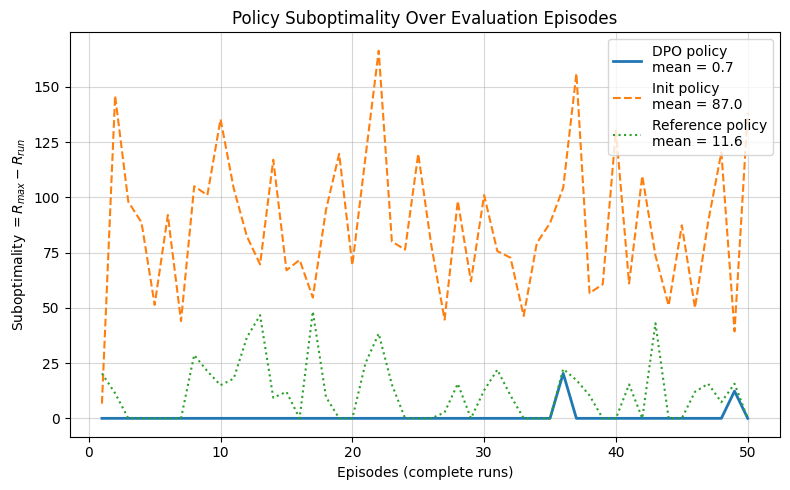

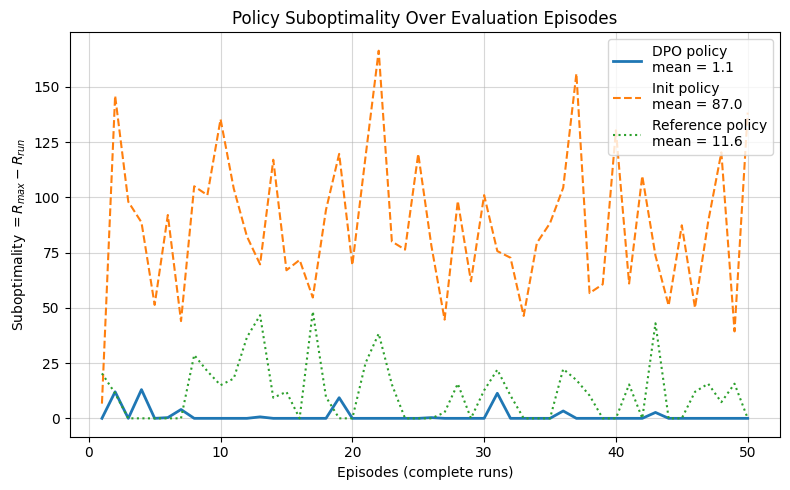

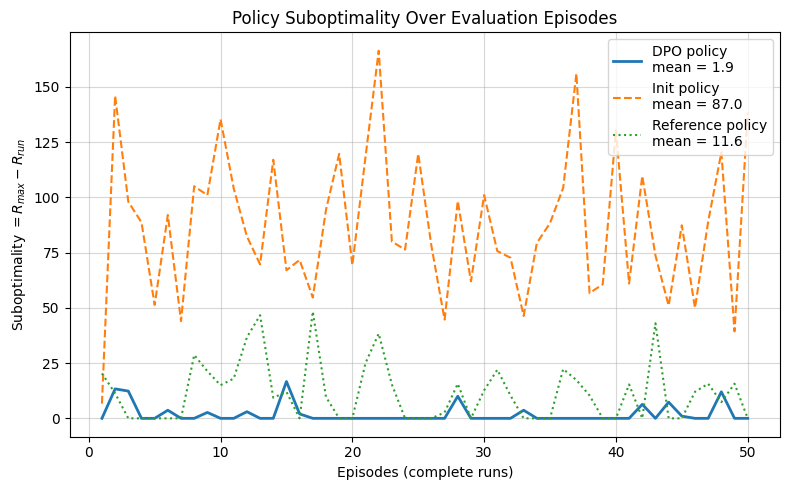

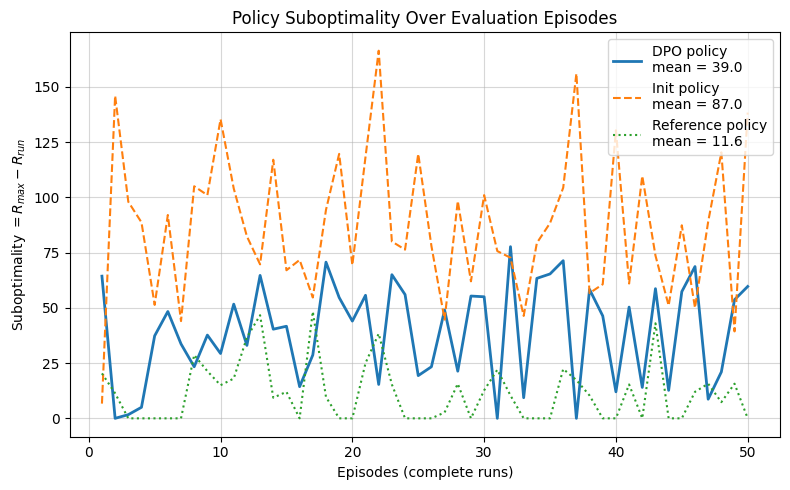

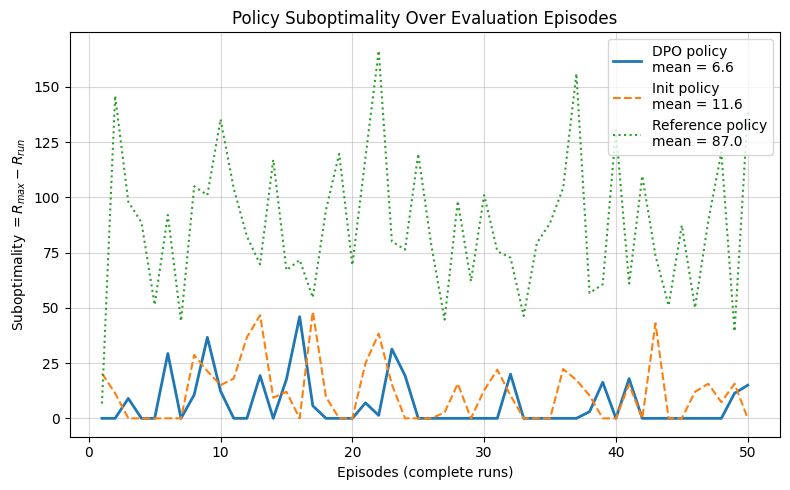

In [49]:
# Example labels: 'pi_DPO_', 'pi1', 'pi2'
print(results.keys())
reward_hist_init = results["pi2"]["graph"]
reward_hist_ref = results["pi1"]["graph"]
reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35"]["graph"]

plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)

reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_K200"]["graph"]

plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)
reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_beta0.005"]["graph"]

plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)
reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_beta0.5_K10"]["graph"]

plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)


reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_beta1_inverted"]["graph"]
reward_hist_init = results["pi1"]["graph"]
reward_hist_ref = results["pi2"]["graph"]
plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)